<a href="https://colab.research.google.com/github/caballeroarturo/Ejemplo7/blob/main/Sesion3/Ejemplo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar librerias

In [1]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
pacman::p_load(ggplot2,dplyr)

# Ejemplo 4. Boxplots y outliers

## Objetivo
Generar y comprender los gráficos de tipo boxplot
Introducción a la distribución de los datos
## Requisitos
Tener previamente instalados R y Rstudio
Lectura de ficheros CVS
Nociones básicas de ggplot
## Desarrollo
Comenzamos leyendo un fichero. Este, contiene información sobre dos grupos de control G1 y G2, a los cuales, se les realizó una medición en 3 momentos diferentes C1, C2 y C3

In [3]:
# library(dplyr) # para usar mutate
data <- read.csv("https://github.com/beduExpert/Programacion-R-MASIVO-2021/raw/main/Sesion-03/Data/boxp.csv")
str(data)

'data.frame':	615 obs. of  3 variables:
 $ Categoria : chr  "C1" "C1" "C1" "C1" ...
 $ Grupo     : int  0 1 0 0 0 0 0 0 1 1 ...
 $ Mediciones: num  82.6 112.6 42.8 44.6 21.6 ...


In [4]:
names(data)

[1] "Categoria"  "Grupo"      "Mediciones"

In [5]:
head(data)

,Categoria,Grupo,Mediciones
,<chr>,<int>,<dbl>
1,C1,0,82.6
2,C1,1,112.6
3,C1,0,42.8
4,C1,0,44.6
5,C1,0,21.6
6,C1,0,11.3


In [6]:
summary(data)

  Categoria             Grupo          Mediciones    
 Length:615         Min.   :0.0000   Min.   :  2.80  
 Class :character   1st Qu.:0.0000   1st Qu.: 23.45  
 Mode  :character   Median :0.0000   Median : 49.30  
                    Mean   :0.2439   Mean   : 62.88  
                    3rd Qu.:0.0000   3rd Qu.: 82.85  
                    Max.   :1.0000   Max.   :290.60  
                                     NA's   :24      

Como estamos ante la presencia de NA´s los eliminamos con na.omit() y solamente seleccionamos aquellos sin NA y convertimos en factores la variable Categoria y Grupo , finalmente observa la estructura del df.

In [8]:
nrow(data) # renglones

[1] 615

In [9]:
data <- na.omit(data)

In [10]:
nrow(data) # perdimos intencionalmente 24 renglones

[1] 591

In [11]:
data <- data %>%
  mutate(Categoria = factor(Categoria),
         Grupo     = factor(Grupo))


In [12]:
summary(data)

 Categoria Grupo     Mediciones    
 C1:202    0:444   Min.   :  2.80  
 C2:195    1:147   1st Qu.: 23.45  
 C3:194            Median : 49.30  
                   Mean   : 62.88  
                   3rd Qu.: 82.85  
                   Max.   :290.60  

In [13]:
str(data)

'data.frame':	591 obs. of  3 variables:
 $ Categoria : Factor w/ 3 levels "C1","C2","C3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Grupo     : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 2 2 ...
 $ Mediciones: num  82.6 112.6 42.8 44.6 21.6 ...
 - attr(*, "na.action")= 'omit' Named int [1:24] 15 69 198 224 261 270 273 275 286 307 ...
  ..- attr(*, "names")= chr [1:24] "15" "69" "198" "224" ...


## BoxPlot

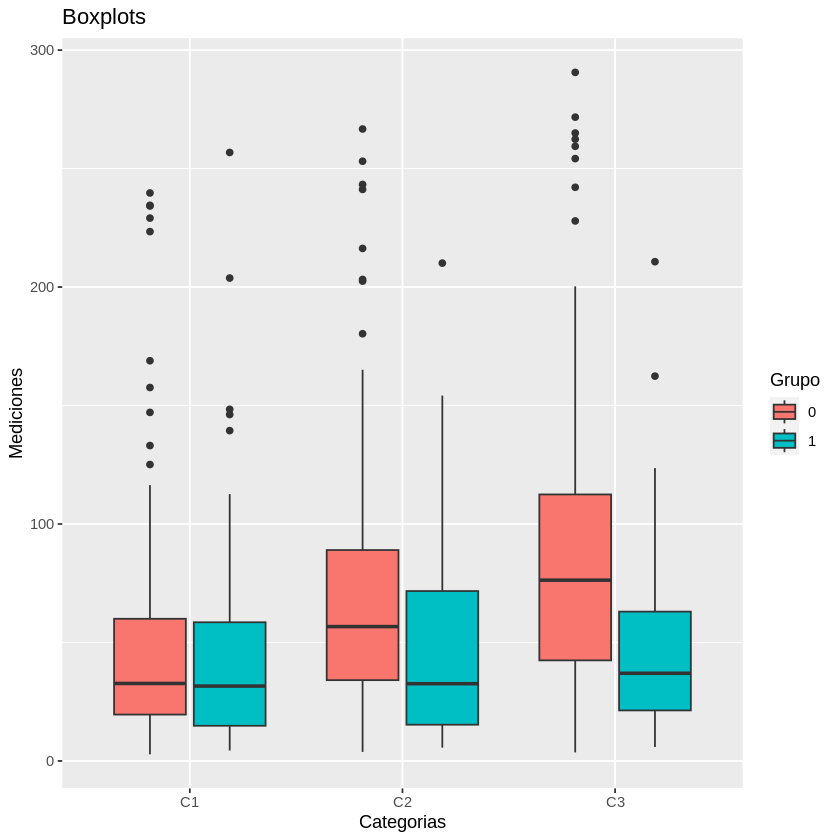

In [15]:
data %>%
  ggplot(aes(x = Categoria, y = Mediciones, fill = Grupo)) +
    geom_boxplot() +
    labs(title= "Boxplots",
         x    = "Categorias",
         y    = "Mediciones")

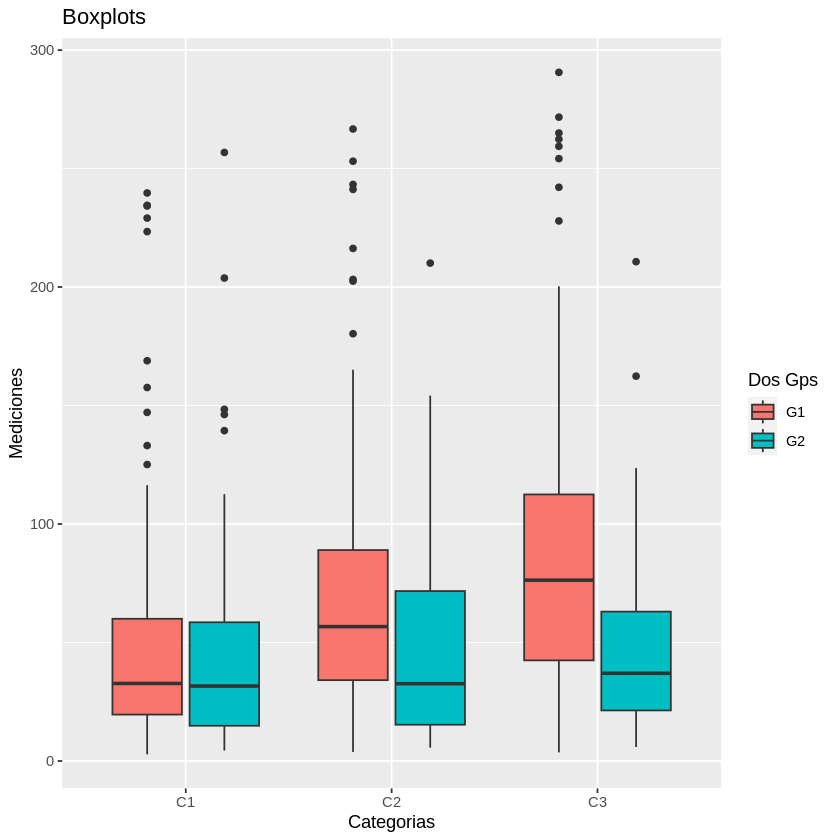

In [16]:
data %>%
  ggplot(aes(x = Categoria, y = Mediciones, fill = Grupo)) +
    geom_boxplot()+
    labs(title= "Boxplots",
         x    = "Categorias",
         y    = "Mediciones") +
    scale_fill_discrete(name = "Dos Gps", labels = c("G1", "G2"))

In [19]:
g <- data %>%
    ggplot(aes(x = Categoria, y = Mediciones, fill = Grupo)) +
      geom_boxplot() +
      labs(title= "Boxplots",
           x    = "Categorias",
           y    = "Mediciones")

In [21]:
g <- g + scale_fill_discrete(name = "Dos Gps", labels = c("G1", "G2"))

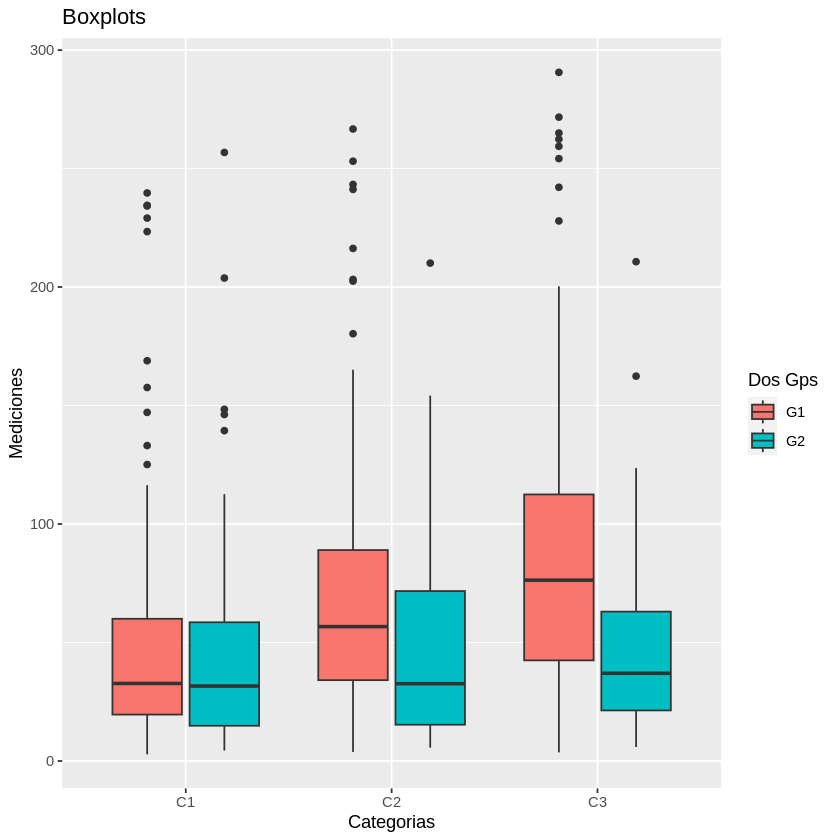

In [22]:
g